<a href="https://colab.research.google.com/github/saisampaththumati-datascientists/Bagging-and-Random-Forest/blob/main/regrestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import tensorflow as tf

In [3]:
df = pd.read_csv('/content/auto-mpg (2).csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
# we have generated the the data
# Now we need to see the null in the data
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
digit_val=pd.DataFrame(df.horsepower.str.isdigit())
df[digit_val["horsepower"]==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [8]:
df=df.replace('?',np.NaN)
df[digit_val["horsepower"]==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [10]:
df=df.drop("car name",axis=1)

In [11]:
convert_nan= lambda x:x.fillna(x.median())
df=df.apply(convert_nan,axis=0)

In [12]:
df["horsepower"]= df["horsepower"].astype(float)

In [13]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [25]:
X=df.drop("mpg",axis=1)
y=df["mpg"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
ct=make_column_transformer((MinMaxScaler(),["cylinders","displacement","horsepower","weight","acceleration","model year"]))
x_trin_ct=ct.fit_transform(x_train)
x_test_ct=ct.transform(x_test)

In [27]:
x_trin_ct

array([[1.        , 0.60981912, 0.58100559, 0.51601928, 0.23809524,
        0.        ],
       [0.2       , 0.0749354 , 0.23463687, 0.1465835 , 0.38690476,
        0.        ],
       [0.2       , 0.05943152, 0.12290503, 0.11681316, 0.60714286,
        1.        ],
       ...,
       [0.2       , 0.17054264, 0.27374302, 0.25574142, 0.4047619 ,
        0.66666667],
       [0.2       , 0.05426357, 0.08938547, 0.12390133, 0.55357143,
        0.91666667],
       [0.2       , 0.0749354 , 0.        , 0.09554862, 0.77380952,
        0.25      ]])

##Building the model with the basic parameters
using the Tensor flow Naming as model_1

In [28]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])
model_1.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])
history=model_1.fit(x_trin_ct,y_train,epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 22.1080 - mae: 22.1080
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 19.9638 - mae: 19.9638
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 17.0458 - mae: 17.0458
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 13.6700 - mae: 13.6700
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 11.5108 - mae: 11.5108
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 10.5579 - mae: 10.5579
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 9.8695 - mae: 9.8695
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 9.1608 - mae: 9.1608
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 8.3340 - mae: 8.3340
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 7.4333 - mae: 7.4333
Epoch 11/100
10/10 [===========================

In [29]:
#evaluting the x_train,y_train
model_1.evaluate(x_trin_ct,y_train)

10/10 [==============================] - 0s 5ms/step - loss: 2.6454 - mae: 2.6454


[2.6453890800476074, 2.6453890800476074]

In [37]:
#evaluting the x_test,y_test
model_1loss,model_1_mae=model_1.evaluate(x_test_ct,y_test)
model_1loss,model_1_mae

3/3 [==============================] - 0s 5ms/step - loss: 2.3319 - mae: 2.3319


(2.3318638801574707, 2.3318638801574707)

Text(0.5, 0, 'epochs')

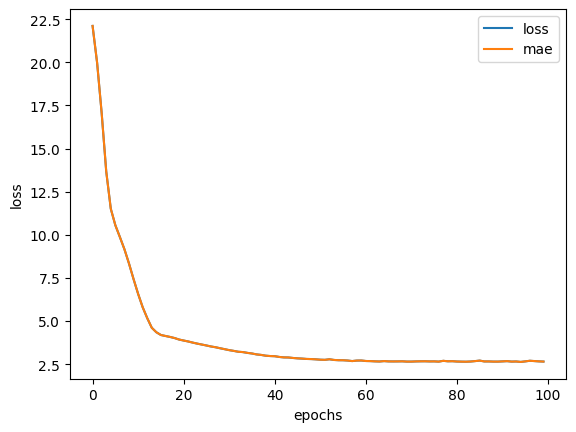

In [32]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# we are creating the model_2
- we are adding the some of the hyperparameter and check the scores with model_1

In [40]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="sigmoid"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])
model_2.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])
history=model_2.fit(x_trin_ct,y_train,epochs=200,verbose=1)

Epoch 1/200
10/10 [==============================] - 1s 6ms/step - loss: 24.2811 - mae: 24.2811
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 22.1182 - mae: 22.1182
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 19.8870 - mae: 19.8870
Epoch 4/200
10/10 [==============================] - 0s 4ms/step - loss: 17.5065 - mae: 17.5065
Epoch 5/200
10/10 [==============================] - 0s 4ms/step - loss: 14.9083 - mae: 14.9083
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 12.0899 - mae: 12.0899
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 9.5727 - mae: 9.5727
Epoch 8/200
10/10 [==============================] - 0s 4ms/step - loss: 7.9585 - mae: 7.9585
Epoch 9/200
10/10 [==============================] - 0s 4ms/step - loss: 7.2016 - mae: 7.2016
Epoch 10/200
10/10 [==============================] - 0s 4ms/step - loss: 6.9427 - mae: 6.9427
Epoch 11/200
10/10 [===========================

In [41]:
model_2loss,model_2_mae=model_2.evaluate(x_trin_ct,y_train)
model_2loss,model_2_mae

10/10 [==============================] - 0s 3ms/step - loss: 2.3116 - mae: 2.3116


(2.3116400241851807, 2.3116400241851807)

In [42]:
model_2loss,model_2_mae=model_2.evaluate(x_test_ct,y_test)
model_2loss,model_2_mae

3/3 [==============================] - 0s 6ms/step - loss: 1.9750 - mae: 1.9750


(1.9750438928604126, 1.9750438928604126)

# The below comparision there is slight difference in the score

In [43]:
#comapring the values
model_1loss,model_1_mae, model_2loss,model_2_mae

(2.3318638801574707,
 2.3318638801574707,
 1.9750438928604126,
 1.9750438928604126)

Text(0.5, 0, 'epochs')

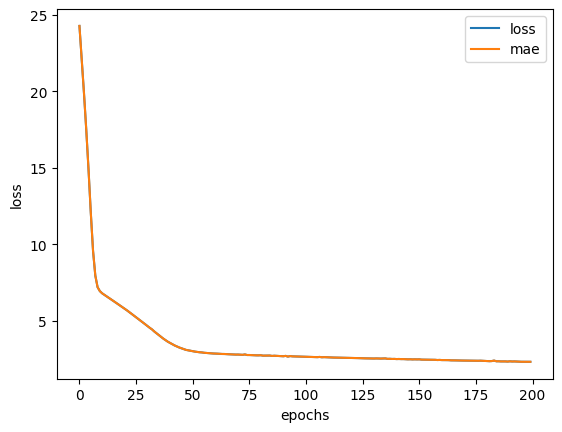

In [44]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

we are checking with scaling and without scaling

In [47]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="sigmoid"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)])
model_2.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])
history=model_2.fit(x_train,y_train,epochs=200,verbose=1)

Epoch 1/200
10/10 [==============================] - 2s 4ms/step - loss: 22.9865 - mae: 22.9865
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 20.2963 - mae: 20.2963
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 17.7043 - mae: 17.7043
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 14.9541 - mae: 14.9541
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 12.0462 - mae: 12.0462
Epoch 6/200
10/10 [==============================] - 0s 7ms/step - loss: 9.4456 - mae: 9.4456
Epoch 7/200
10/10 [==============================] - 0s 6ms/step - loss: 7.6819 - mae: 7.6819
Epoch 8/200
10/10 [==============================] - 0s 4ms/step - loss: 6.8925 - mae: 6.8925
Epoch 9/200
10/10 [==============================] - 0s 5ms/step - loss: 6.7135 - mae: 6.7135
Epoch 10/200
10/10 [==============================] - 0s 5ms/step - loss: 6.6464 - mae: 6.6464
Epoch 11/200
10/10 [=============================

In [48]:
x_train_loss,x_train_mae=model_2.evaluate(x_train,y_train)
x_train_loss,x_train_mae

10/10 [==============================] - 0s 3ms/step - loss: 6.1440 - mae: 6.1440


(6.144028186798096, 6.144028186798096)

## There is a huge difference in the scaling and non scaling
- From this score it is 50% difference in the data

# New Section